In [78]:
#packages inginstaleerd
# !pip install geopandas
# !pip install geopandas matplotlib

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

from scipy import stats
import seaborn as sns

# imprteren van data sets:
de in gepoteerde datasets zijn:
- Sensornet

In [79]:
pd.set_option("display.max_columns", None)

# Define time range
start_date = int(pd.to_datetime('2025-03-23').timestamp())
end_date = int(pd.to_datetime('2025-03-25').timestamp())

# Define URL properly formatted
url = (
    f"https://sensornet.nl/dataserver3/event/collection/nina_events/stream"
    f"?conditions%5B0%5D%5B%5D=time&conditions%5B0%5D%5B%5D=%3E%3D&conditions%5B0%5D%5B%5D={start_date}"
    f"&conditions%5B1%5D%5B%5D=time&conditions%5B1%5D%5B%5D=%3C&conditions%5B1%5D%5B%5D={end_date}"
    f"&conditions%5B2%5D%5B%5D=label&conditions%5B2%5D%5B%5D=in&conditions%5B2%5D%5B2%5D%5B%5D=21"
    f"&conditions%5B2%5D%5B2%5D%5B%5D=32&conditions%5B2%5D%5B2%5D%5B%5D=33&conditions%5B2%5D%5B2%5D%5B%5D=34"
    f"&args%5B%5D=aalsmeer&args%5B%5D=schiphol"
    f"&fields%5B%5D=time&fields%5B%5D=location_short&fields%5B%5D=location_long&fields%5B%5D=duration"
    f"&fields%5B%5D=SEL&fields%5B%5D=SELd&fields%5B%5D=SELe&fields%5B%5D=SELn&fields%5B%5D=SELden"
    f"&fields%5B%5D=SEL_dB&fields%5B%5D=lasmax_dB&fields%5B%5D=callsign&fields%5B%5D=type"
    f"&fields%5B%5D=altitude&fields%5B%5D=distance&fields%5B%5D=winddirection"
    f"&fields%5B%5D=windspeed&fields%5B%5D=label&fields%5B%5D=hex_s&fields%5B%5D=registration"
    f"&fields%5B%5D=icao_type&fields%5B%5D=serial&fields%5B%5D=operator&fields%5B%5D=tags"
)

# Make request with error handling
response = requests.get(url)


json_data = response.json()
colnames = pd.DataFrame(json_data.get('metadata', []))
data = pd.DataFrame(json_data.get('rows', []))

if not colnames.empty and 'headers' in colnames:
            data.columns = colnames['headers']

            # Convert time column to datetime
            data['time'] = pd.to_datetime(data['time'], unit='s')
            print("Time range:", data['time'].min(), "to", data['time'].max())

            # Display first few rows
            print(data.head())
df = data
df.head(10)

# df['location_long'].unique

Time range: 2025-03-23 03:16:00 to 2025-03-24 23:30:27
headers         id location_short   location_long                time  \
0        132512331             Aa  Aalsmeerderweg 2025-03-23 05:56:04   
1        132512341             Aa  Aalsmeerderweg 2025-03-23 05:59:57   
2        132512361             Aa  Aalsmeerderweg 2025-03-23 06:05:38   
3        132512371             Aa  Aalsmeerderweg 2025-03-23 06:08:38   
4        132512381             Aa  Aalsmeerderweg 2025-03-23 06:11:23   

headers       SELd  SELe       SELn      SELden        SEL     SEL_dB  \
0                0     0  263093000  2630930000  263093000  84.201088   
1         97838300     0  483989000  4937730000  581828000  87.647943   
2        187415000     0          0   187415000  187415000  82.728040   
3        105051000     0          0   105051000  105051000  80.213990   
4        357945000     0          0   357945000  357945000  85.538159   

headers  lasmax_dB  distance  altitude  label  windspeed  winddirec

headers,id,location_short,location_long,time,SELd,SELe,SELn,SELden,SEL,SEL_dB,lasmax_dB,distance,altitude,label,windspeed,winddirection,callsign,type,tags,duration,hex_s,registration,icao_type,serial,operator
0,132512331,Aa,Aalsmeerderweg,2025-03-23 05:56:04,0,0,263093000,2630930000,263093000,84.201088,74.9,753.605,610.145,21,4.0,124.0,KLM1917,Embraer ERJ190-100STD,Aalsmeerbaan18L_T,56,485065,PH-EZZ,E190,19000654,KLM Cityhopper
1,132512341,Aa,Aalsmeerderweg,2025-03-23 05:59:57,97838300,0,483989000,4937730000,581828000,87.647943,77.7,843.935,495.684,21,4.0,124.0,KLM1601,Boeing 737-800,Kaagbaan24_T,75,484130,PH-BXA,B738,29131,
2,132512361,Aa,Aalsmeerderweg,2025-03-23 06:05:38,187415000,0,0,187415000,187415000,82.728040,71.4,878.388,693.133,21,4.0,115.0,KLM13H,Embraer ERJ 170-200 STD,Aalsmeerbaan36R_T,76,4852F4,PH-EXG,E75L,17000546,
3,132512371,Aa,Aalsmeerderweg,2025-03-23 06:08:38,105051000,0,0,105051000,105051000,80.213990,68.0,1197.090,610.446,21,4.0,115.0,ITY119,Airbus A319 111,Aalsmeerbaan18L_T,69,4CA98A,EI-IMN,A319,4764,Alitalia
4,132512381,Aa,Aalsmeerderweg,2025-03-23 06:11:23,357945000,0,0,357945000,357945000,85.538159,75.8,723.849,569.971,21,4.0,111.0,KLM29L,Embraer ERJ190-100LR,Aalsmeerbaan36R_T,52,484F7E,PH-EZV,E190,19000528,KLM Cityhopper
5,132512391,Aa,Aalsmeerderweg,2025-03-23 06:12:38,222169000,0,0,222169000,222169000,83.466830,72.0,1150.740,577.516,21,4.0,111.0,KLM27E,Boeing 737-800,Oostbaan04_T,52,484132,PH-BXC,B738,29133,
6,132512401,Aa,Aalsmeerderweg,2025-03-23 06:13:42,344751000,0,0,344751000,344751000,85.375058,74.3,792.887,696.867,21,4.0,111.0,LOT7LA,Embraer EMB-175 LR,Kaagbaan24_T,66,48AD0B,SP-LIL,E170,17000306,LOT Polish Airlines
7,132512411,Aa,Aalsmeerderweg,2025-03-23 06:15:25,257950000,0,0,257950000,257950000,84.115351,73.1,949.300,665.027,21,4.0,111.0,AUA3NA,None,Aalsmeerbaan18L_T,81,440608,None,None,None,None
8,132512431,Aa,Aalsmeerderweg,2025-03-23 06:24:42,28495100,0,0,28495100,28495100,74.547703,61.9,2609.050,1971.870,21,4.0,116.0,KLM49K,Embraer ERJ 170-200 STD,Zwanenburgbaan36C_T,57,485779,PH-EXS,E75L,17000702,Klm Cityhopper
9,132512441,Aa,Aalsmeerderweg,2025-03-23 06:29:09,5288870,0,0,5288870,5288870,67.233628,54.1,2900.970,113.821,21,4.0,116.0,EJU47RY,Airbus A319-111,Kaagbaan24_T,63,440735,OE-LQS,A319,4040,EasyJet Europe


Data cleanen 

In [80]:
df_filtered = df[df['lasmax_dB'] < 120]

df= df_filtered

df.head()


headers,id,location_short,location_long,time,SELd,SELe,SELn,SELden,SEL,SEL_dB,lasmax_dB,distance,altitude,label,windspeed,winddirection,callsign,type,tags,duration,hex_s,registration,icao_type,serial,operator
0,132512331,Aa,Aalsmeerderweg,2025-03-23 05:56:04,0,0,263093000,2630930000,263093000,84.201088,74.9,753.605,610.145,21,4.0,124.0,KLM1917,Embraer ERJ190-100STD,Aalsmeerbaan18L_T,56,485065,PH-EZZ,E190,19000654,KLM Cityhopper
1,132512341,Aa,Aalsmeerderweg,2025-03-23 05:59:57,97838300,0,483989000,4937730000,581828000,87.647943,77.7,843.935,495.684,21,4.0,124.0,KLM1601,Boeing 737-800,Kaagbaan24_T,75,484130,PH-BXA,B738,29131,
2,132512361,Aa,Aalsmeerderweg,2025-03-23 06:05:38,187415000,0,0,187415000,187415000,82.728040,71.4,878.388,693.133,21,4.0,115.0,KLM13H,Embraer ERJ 170-200 STD,Aalsmeerbaan36R_T,76,4852F4,PH-EXG,E75L,17000546,
3,132512371,Aa,Aalsmeerderweg,2025-03-23 06:08:38,105051000,0,0,105051000,105051000,80.213990,68.0,1197.090,610.446,21,4.0,115.0,ITY119,Airbus A319 111,Aalsmeerbaan18L_T,69,4CA98A,EI-IMN,A319,4764,Alitalia
4,132512381,Aa,Aalsmeerderweg,2025-03-23 06:11:23,357945000,0,0,357945000,357945000,85.538159,75.8,723.849,569.971,21,4.0,111.0,KLM29L,Embraer ERJ190-100LR,Aalsmeerbaan36R_T,52,484F7E,PH-EZV,E190,19000528,KLM Cityhopper


In [81]:
df = df.dropna(subset=['altitude'])

In [82]:
df = df.drop_duplicates(subset=['altitude'])

In [83]:
df['altitude'] = pd.to_numeric(df['altitude'], errors='coerce')

In [84]:
# Gegeven waarden
d_diagonaal = df['distance'] # m
d_hoogte = df['altitude']  # m
L1 = df['lasmax_dB']  # dB

# Afstand van waarnemer tot vliegtuig
d1 = d_diagonaal

# Afstand direct onder vliegtuig
d2 = d_hoogte

# Berekening geluidsniveau onder vliegtuig
L2 = L1 + 20 * np.log10(d1 / d2)
df["max_db_onder"]= L2
df.head(10)
pd.set_option('display.max_rows', None)
unique_types = df['type'].unique()
print(unique_types)


['Embraer ERJ190-100STD' 'Boeing 737-800' 'Embraer ERJ 170-200 STD'
 'Airbus A319 111' 'Embraer ERJ190-100LR' 'Embraer EMB-175 LR' None
 'Airbus A319-111' 'Cessna Citation XLS' 'Embraer ERJ 190-100 STD'
 'Boeing 737-700' 'Embraer EMB-170 STD' 'Airbus A320-271N'
 'Airbus A320-214SL' 'Boeing 777-300ER' 'Boeing 737-900'
 'Embraer EMB-195 LR' 'Airbus SAS A330-203' 'Boeing 777-200'
 'Boeing 777 31HER' 'Airbus SAS A330-303' 'Boeing 737-8H6/W'
 'Boeing 737NG 958ER/W' 'Airbus A320 - 214SL' 'Airbus A320 216'
 'Airbus A300 B4-622RF' 'Airbus A330 343E' 'Airbus A330 243'
 'Airbus A318 111' 'Airbus A350 941' 'Airbus A330 302'
 'Boeing 737NG 8AS/W' 'Dassault Falcon 900EX' 'Embraer Phenom 300'
 'Airbus A380 861' 'Boeing 787-9' 'Airbus A319 112' 'Boeing 777 3DZER'
 'Boeing 787 9' 'Airbus A320 214' 'Dassault Falcon 2000EX EASy'
 'Airbus A320 232' 'Boeing 777F' 'Airbus A321 211' 'Boeing 747 8B5F'
 'Boeing 747 4R7F' 'Boeing 787 8' 'Airbus A320 214SL'
 'Canadair CL-600-2B19 CRJ-200LR' 'Boeing 777 3FXER' '

In [85]:
# Gegevens
types = df['type']
# Maak een lijst met de veel voorkomende types (de eerste woorden)
types_to_group = [
    'Airbus A320', 'Airbus A330', 'Airbus A350', 'Boeing 737', 'Boeing 777', 
    'Boeing 787', 'Boeing 747', 'Embraer ERJ', 'Canadair CRJ', 'Cessna', 
    'Bombardier', 'Embraer EMB', 'Airbus A319', 'Boeing 767', 'Fokker', 
    'Airbus A321', 'Airbus A318', 'Boeing 767', 'Textron Aviation'
]

# Mappen naar basis types
mapper = {}

# Voor elk type dat we moeten groeperen, kijk naar de eerste paar woorden
for aircraft in types:
    if isinstance(aircraft, str):  # Controleren of de waarde een string is
        for type_name in types_to_group:
            if aircraft.startswith(type_name):
                if type_name not in mapper:
                    mapper[aircraft] = type_name
                else:
                    mapper[aircraft] = type_name

# De dictionary bevat nu de mappen van versies naar hun basisnaam
print(mapper)

# Hier kun je de vervangingen doorvoeren
df['type'] = df['type'].replace(mapper)

# Toon de dataframe na de vervangingen
df.head()


{'Embraer ERJ190-100STD': 'Embraer ERJ', 'Boeing 737-800': 'Boeing 737', 'Embraer ERJ 170-200 STD': 'Embraer ERJ', 'Airbus A319 111': 'Airbus A319', 'Embraer ERJ190-100LR': 'Embraer ERJ', 'Embraer EMB-175 LR': 'Embraer EMB', 'Airbus A319-111': 'Airbus A319', 'Cessna Citation XLS': 'Cessna', 'Embraer ERJ 190-100 STD': 'Embraer ERJ', 'Boeing 737-700': 'Boeing 737', 'Embraer EMB-170 STD': 'Embraer EMB', 'Airbus A320-271N': 'Airbus A320', 'Airbus A320-214SL': 'Airbus A320', 'Boeing 777-300ER': 'Boeing 777', 'Boeing 737-900': 'Boeing 737', 'Embraer EMB-195 LR': 'Embraer EMB', 'Boeing 777-200': 'Boeing 777', 'Boeing 777 31HER': 'Boeing 777', 'Boeing 737-8H6/W': 'Boeing 737', 'Boeing 737NG 958ER/W': 'Boeing 737', 'Airbus A320 - 214SL': 'Airbus A320', 'Airbus A320 216': 'Airbus A320', 'Airbus A330 343E': 'Airbus A330', 'Airbus A330 243': 'Airbus A330', 'Airbus A318 111': 'Airbus A318', 'Airbus A350 941': 'Airbus A350', 'Airbus A330 302': 'Airbus A330', 'Boeing 737NG 8AS/W': 'Boeing 737', 'Boei

headers,id,location_short,location_long,time,SELd,SELe,SELn,SELden,SEL,SEL_dB,lasmax_dB,distance,altitude,label,windspeed,winddirection,callsign,type,tags,duration,hex_s,registration,icao_type,serial,operator,max_db_onder
0,132512331,Aa,Aalsmeerderweg,2025-03-23 05:56:04,0,0,263093000,2630930000,263093000,84.201088,74.9,753.605,610.145,21,4.0,124.0,KLM1917,Embraer ERJ,Aalsmeerbaan18L_T,56,485065,PH-EZZ,E190,19000654,KLM Cityhopper,76.734214
1,132512341,Aa,Aalsmeerderweg,2025-03-23 05:59:57,97838300,0,483989000,4937730000,581828000,87.647943,77.7,843.935,495.684,21,4.0,124.0,KLM1601,Boeing 737,Kaagbaan24_T,75,484130,PH-BXA,B738,29131,,82.322082
2,132512361,Aa,Aalsmeerderweg,2025-03-23 06:05:38,187415000,0,0,187415000,187415000,82.728040,71.4,878.388,693.133,21,4.0,115.0,KLM13H,Embraer ERJ,Aalsmeerbaan36R_T,76,4852F4,PH-EXG,E75L,17000546,,73.457396
3,132512371,Aa,Aalsmeerderweg,2025-03-23 06:08:38,105051000,0,0,105051000,105051000,80.213990,68.0,1197.090,610.446,21,4.0,115.0,ITY119,Airbus A319,Aalsmeerbaan18L_T,69,4CA98A,EI-IMN,A319,4764,Alitalia,73.849591
4,132512381,Aa,Aalsmeerderweg,2025-03-23 06:11:23,357945000,0,0,357945000,357945000,85.538159,75.8,723.849,569.971,21,4.0,111.0,KLM29L,Embraer ERJ,Aalsmeerbaan36R_T,52,484F7E,PH-EZV,E190,19000528,KLM Cityhopper,77.875905


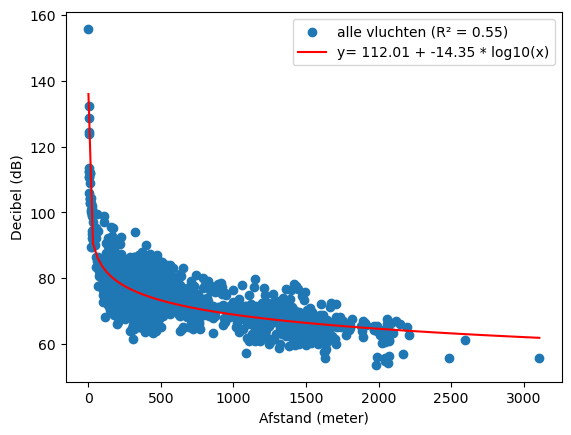

De aangepaste formule is: decibel = 112.01 + -14.35 * log10(afstand)
R²-waarde: 0.55


In [86]:
# Verwijder ongeldige waarden (NaN of oneindige waarden) in de relevante kolommen
cleaned_df = df.dropna(subset=['max_db_onder', 'altitude'])
cleaned_df = cleaned_df[~cleaned_df['max_db_onder'].isin([float('inf'), float('-inf')])]

# Sorteer de DataFrame op 'altitude'
cleaned_df = cleaned_df.sort_values(by='altitude')

# Gegeven data (vervang deze met jouw eigen data)
afstanden = cleaned_df['altitude']
decibels = cleaned_df['max_db_onder']

def logaritmische_functie(afstand, a, b):
    return a + b * np.log10(afstand)

parameters, covariantie = curve_fit(logaritmische_functie, afstanden, decibels)
a, b = parameters

# Genereer punten voor de vloeiende lijn
x_fit = np.linspace(min(afstanden), max(afstanden), 100)
y_fit = logaritmische_functie(x_fit, a, b)

# Bereken de R²-waarde
y_pred = logaritmische_functie(afstanden, a, b)
r2 = r2_score(decibels, y_pred)

plt.scatter(afstanden, decibels, label=f"alle vluchten (R² = {r2:.2f})")
plt.plot(x_fit, y_fit, color="red", label="y= 112.01 + -14.35 * log10(x)")
plt.xlabel("Afstand (meter)")
plt.ylabel("Decibel (dB)")
plt.legend()
plt.show()

print(f"De aangepaste formule is: decibel = {a:.2f} + {b:.2f} * log10(afstand)")
print(f"R²-waarde: {r2:.2f}")

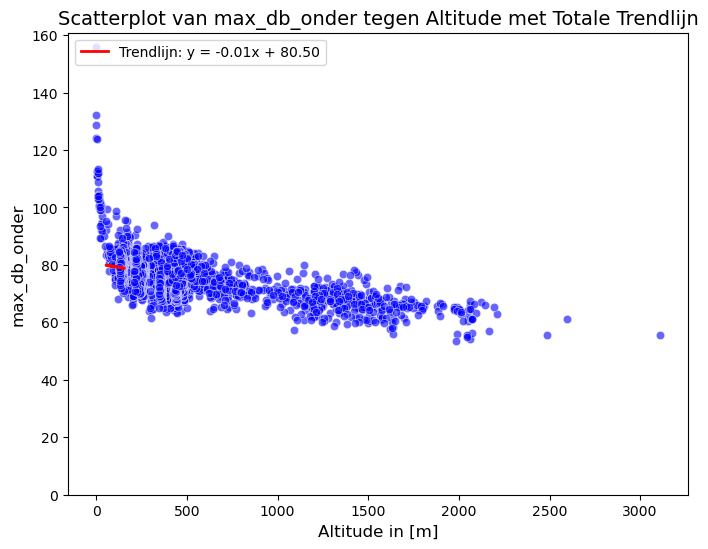

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy import stats

# # Verwijder ongeldige waarden (NaN of oneindige waarden) in de relevante kolommen
# cleaned_df = df.dropna(subset=['max_db_onder', 'altitude'])  # Verwijder rijen met NaN in de kolommen 'max_db_onder' of 'altitude'
# cleaned_df = cleaned_df[~cleaned_df['max_db_onder'].isin([float('inf'), float('-inf')])]  # Verwijder oneindige waarden

# # Maak de scatterplot van de schone data
# plt.figure(figsize=(8, 6))

# # Maak een scatterplot van de schone data
# sns.scatterplot(y='max_db_onder', x='altitude', data=cleaned_df, color='blue', alpha=0.6)

# # Bereken de trendlijn voor de schone data
# slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_df['altitude'], cleaned_df['max_db_onder'])

# # Voeg de trendlijn toe aan de plot
# x_vals = cleaned_df['max_db_onder']
# y_vals = slope * x_vals + intercept
# plt.plot(x_vals, y_vals, color='red', linewidth=2, label=f'Trendlijn: y = {slope:.2f}x + {intercept:.2f}')

# # Voeg titels en labels toe
# plt.title('Scatterplot van max_db_onder tegen Altitude met Totale Trendlijn', fontsize=14)
# plt.xlabel('Altitude in [m]', fontsize=12)
# plt.ylabel('max_db_onder', fontsize=12)

# # Voeg een legenda toe voor de trendlijn
# plt.legend(loc='upper left', fontsize=10)

# # Stel de limieten voor de y-as in zodat deze niet onder nul gaat
# plt.ylim(bottom=0)

# # Toon de plot
# plt.show()


In [88]:
# x= 0

# y= -0.03* x +89
# print(y)

<Figure size 800x600 with 0 Axes>

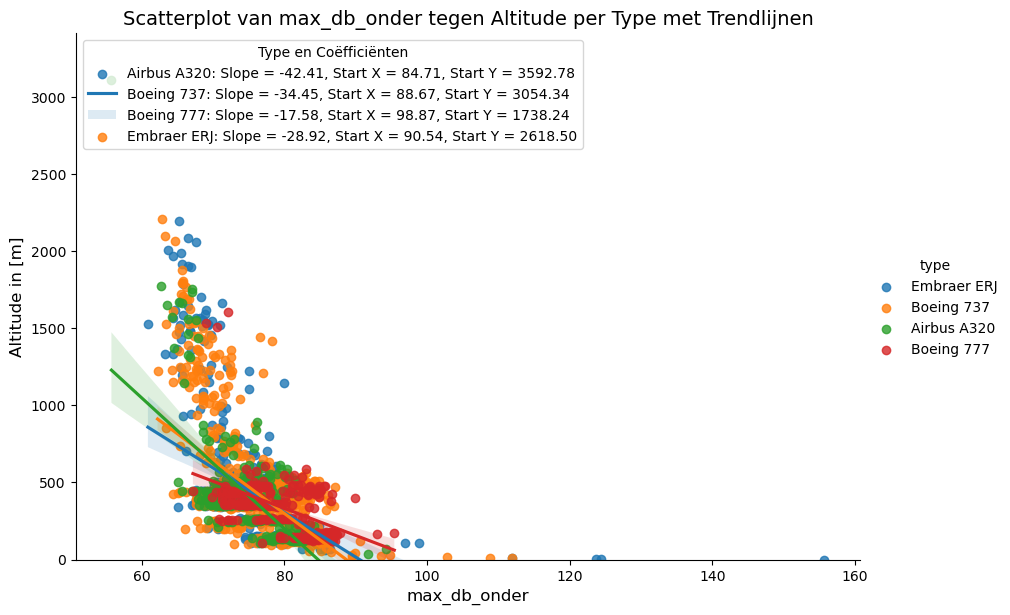

,type,slope,start_x,start_y
0,Airbus A320,-42.413970,84.707585,3592.784973
1,Boeing 737,-34.445993,88.670366,3054.338837
2,Boeing 777,-17.580523,98.872860,1738.236556
3,Embraer ERJ,-28.921824,90.537104,2618.498154


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Eerst filteren we de DataFrame op basis van het aantal gegevenspunten per 'type'
filtered_df = df.groupby('type').filter(lambda x: len(x) >= 200)

# Maak de scatterplot met trendlijnen gesplitst op type (nu met gefilterde data)
plt.figure(figsize=(8, 6))
sns.lmplot(x='max_db_onder', y='altitude', data=filtered_df, hue='type', markers='o', height=6, aspect=1.5)

# Bereken de richtingscoëfficiënt, start_x (snijpunt met x-as) en start_y (snijpunt met y-as)
legend_labels = []
startpunten = []

for label, group in filtered_df.groupby('type'):
    slope, intercept, r_value, p_value, std_err = stats.linregress(group['max_db_onder'], group['altitude'])
    
    # Controleer of slope geldig is om deling door nul te voorkomen
    if pd.isna(slope) or slope == 0:
        start_x = None  # Geen geldig startpunt op x-as
        slope = 0  
    else:
        start_x = -intercept / slope  # Bereken het snijpunt met de x-as
    
    start_y = intercept  # Snijpunt met de y-as
    
    # Voeg toe aan de lijst met labels
    legend_labels.append(f'{label}: Slope = {slope:.2f}, Start X = {start_x:.2f}, Start Y = {start_y:.2f}' if start_x is not None else f'{label}: Slope = {slope:.2f}, Start X = N/A, Start Y = {start_y:.2f}')
    
    # Voeg toe aan de dataframe lijst
    startpunten.append({'type': label, 'slope': slope, 'start_x': start_x, 'start_y': start_y})

# Maak een dataframe met de startpunten en richtingscoëfficiënten
startpunten_df = pd.DataFrame(startpunten)

# Voeg de aangepaste legenda toe
plt.legend(title='Type en Coëfficiënten', labels=legend_labels, loc='upper left', fontsize=10)

# Voeg titels en labels toe
plt.title('Scatterplot van max_db_onder tegen Altitude per Type met Trendlijnen', fontsize=14)
plt.xlabel('max_db_onder', fontsize=12)
plt.ylabel('Altitude in [m]', fontsize=12)

# Stel de limieten voor de y-as in zodat deze niet onder nul gaat
plt.ylim(bottom=0)

# Toon de plot
plt.show()

# Toon het dataframe met startpunten
startpunten_df.head(40)

In [90]:
startpunten_df['slope in dB / m'] = startpunten_df['slope'] ** -1

startpunten_df.head()

,type,slope,start_x,start_y,slope in dB / m
0,Airbus A320,-42.413970,84.707585,3592.784973,-0.023577
1,Boeing 737,-34.445993,88.670366,3054.338837,-0.029031
2,Boeing 777,-17.580523,98.872860,1738.236556,-0.056881
3,Embraer ERJ,-28.921824,90.537104,2618.498154,-0.034576


In [91]:
mean = startpunten_df['slope in dB / m'].mean()

mean

-0.036016296647084924

In [92]:
df_merged = df.merge(startpunten_df, how='left', on='type')

df_fill = df_merged[['slope in dB / m', 'callsign', 'type']]

# mean = df_fill['slope in dB / m'].mean()

# df_fill.fillna(value=mean, inplace= True)

df_fill.drop_duplicates(inplace=True)

df_fill.head(20)

/var/folders/fl/nwwn4f014394wwdd1x0fnyn80000gp/T/ipykernel_97145/211074064.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fill.drop_duplicates(inplace=True)


,slope in dB / m,callsign,type
0,-0.034576,KLM1917,Embraer ERJ
1,-0.029031,KLM1601,Boeing 737
2,-0.034576,KLM13H,Embraer ERJ
3,NaN,ITY119,Airbus A319
4,-0.034576,KLM29L,Embraer ERJ
5,-0.029031,KLM27E,Boeing 737
6,NaN,LOT7LA,Embraer EMB
7,NaN,AUA3NA,None
8,-0.034576,KLM49K,Embraer ERJ
9,NaN,EJU47RY,Airbus A319


In [93]:
df_fill.to_csv('dB coef per callsign.csv')

NIet hieronder meer gebruiken

In [94]:
# data = {
#     "type": ["Airbus A320", "Boeing 737", "Boeing 777", "Embraer ERJ"],
#     "slope": [-42.413970, -34.445993, -17.580523, -28.921824],
#     "start_x": [84.707585, 88.670366, 98.872860, 90.537104],
#     "start_y": [3592.784973, 3054.338837, 1738.236556, 2618.498154]
# }

# # Zet de dataset om in een DataFrame
# df = pd.DataFrame(data)

# df.info()

# startpunten_df.info()

In [95]:
# Dataset
# data = {
#     "type": ["Airbus A320", "Boeing 737", "Boeing 777", "Embraer ERJ"],
#     "slope": [-42.413970, -34.445993, -17.580523, -28.921824],
#     "start_x": [84.707585, 88.670366, 98.872860, 90.537104],
#     "start_y": [3592.784973, 3054.338837, 1738.236556, 2618.498154]
# }

# # Zet de dataset om in een DataFrame
# df = pd.DataFrame(data)

df = startpunten_df

# Functie om de decibel te berekenen op basis van de hoogte (start_y)
def calculate_decibel(altitude, aircraft_type):
    # Zoek de rij voor het gegeven vliegtuig
    aircraft_data = df[df['type'] == aircraft_type].iloc[0]
    
    # Haal de slope en start_x op uit de data van dit vliegtuig
    slope = (aircraft_data['slope'])** -1 
    start_x = aircraft_data['start_x']
    
    # Bereken de decibel
    decibel = slope * altitude + start_x
    
    # Zorg ervoor dat de decibelwaarde niet onder nul gaat
    if decibel < 0:
        decibel = 0
    
    return decibel

# Test de functie
altitude = 2000
aircraft_type = "Boeing 737"  # Geef het type vliegtuig aan
decibel_value = calculate_decibel(altitude, aircraft_type)
print(decibel_value)

30.60846067428981


In [96]:
# opgeschoonde_sensornetdata =df.to_csv("opgeschoonde_sensornetdata.csv", sep=",", index=False)

In [97]:
# Je bestaande functie (bereken de decibels)
def calculate_decibel(aircraft_type, altitude, slope, start_y):
    """
    Bereken het aantal decibel voor een bepaald type vliegtuig op een gegeven hoogte.
    
    Formule: y = slope * x + start_y
    
    Parameters:
        aircraft_type (str): Het type vliegtuig.
        altitude (float): De hoogte in meters.
        slope (float): De helling van de lijn.
        start_y (float): De y-intercept waarde.
    
    Returns:
        float: Het aantal decibel, minimaal 0.
    """
    y = slope * altitude + start_y
    return max(0, y)  # Zorgt ervoor dat de decibelwaarde niet onder 0 komt

# Functie om decibels voor elk vliegtuig in de DataFrame te berekenen
def calculate_decibels_for_df(df, altitude):
    df['decibel'] = df.apply(lambda row: calculate_decibel(row['type'], altitude, row['slope'], row['start_y']), axis=1)
    return df

# Stel de hoogte in (bijv. 200 meter)
hoogte = 100

# Bereken de decibelwaarden en voeg ze toe aan je DataFrame
startpunten_df = calculate_decibels_for_df(startpunten_df, hoogte)

# Toon het resultaat
print(startpunten_df[['type', 'decibel']])


          type  decibel
0  Airbus A320        0
1   Boeing 737        0
2   Boeing 777        0
3  Embraer ERJ        0


In [98]:
# import numpy as np

# # Luchtabsorptiecoëfficiënt (bij 1000 Hz, 20°C, 50% vochtigheid)
# alpha = 0.01  # dB per meter

# # Afstanden uit de DataFrame
# d_horizontaal = df['distance']  # m
# d_hoogte = df['altitude']  # m

# # Afstand van waarnemer tot vliegtuig
# df['d1'] = np.sqrt(d_horizontaal**2 + d_hoogte**2)

# # Afstand van meetpunt naar direct onder het vliegtuig (is gelijk aan de hoogte)
# df['d2'] = d_hoogte

# # Origineel geluidsniveau op meetpunt
# L1 = df['SEL_dB']

# # Toepassen van inverse kwadratenwet
# df['L2_no_absorption'] = L1 + 20 * np.log10(df['d1'] / df['d2'])

# # Toepassen van luchtabsorptie (tweemaal: vliegtuig → meetpunt & meetpunt → grond)
# df['L2_with_absorption'] = df['L2_no_absorption'] - alpha * df['d1'] - alpha * df['d2']

# df[['SEL_dB', 'L2_no_absorption', 'L2_with_absorption']].head()
